# Probability Analysis of the Loot Box System in ✨ Genshin Impact ✨


In [ ]:
# Wenjing Ma
# ma.wenjing1@northeastern.edu
# Dec 10, 2023
# CS 5002 @ NEU-CS-Align

## Introduction

### Context

Genshin Impact is a popular free-to-play open-world game with millions of players across all platforms. Central to its monetization strategy is a **Gacha System**, known as '**Wishes**.' In this system, players can use in-game or real-world currency to obtain random items, including unique characters and weapons. The game, while free to download, often encourages players to spend to acquire in-game content. For example, some high-tiered characters and weapons can only be obtained during certain periods, called '**Wish Event**.' Each **Wish Event** usually runs for three weeks and during each **Wish Event**, there are three **Banners**, and each **Banner** contains 1 single 5-Star item (character or weapon) with boosted pull odds, and three boosted 4-Stars. Additionally, the game implements a **pity system**, ensuring a high-rarity (5-Stars and 4-Stars) item after a predetermined number of unsuccessful attempts. For more detailed information, please refer to the webpage here: [Genshin Impact Fandom: Wish](https://genshin-impact.fandom.com/wiki/Wish#:~:text=Limited%2Dtime%20Event%20Wishes%20are,Wishes%20have%20one%20promotional%205&text=character%20and%20three%20featured%204)

As a former game designer and a Genshin Impact player, I believe this tool would help players better understand the expected value of their desired item, so that they can be more strategic in deciding if they really want to participate in certain **Wish Banners**. This tool can also serve as a prototype for game designers to test their numerical design for their loot box systems, with ethical game design in mind, to avoid encouraging excessive spending.

### Terminology

#### Game Terminology:

- **Gacha system**: The monetization system/mechanic in a gacha game (Genshin Impact). Similar to loot boxes, gacha games entice players to spend in-game currency to receive a random in-game item. Some in-game currency generally can be gained through gameplay, and some by purchasing it from the game publisher using real-world funds. ([Wikipedia](https://en.wikipedia.org/wiki/Gacha_game))
- **Pity system**: A feature that guarantees players a specific item after a number of unsuccessful attempts in the gacha system.
- **Banner**: Refers to a set of items available for acquisition through the gacha system, using in-game currency.

#### Genshin Impact Specific Terminology:

- **Star**: A rating system indicating the rarity of an item in the game. In Genshin Impact, items are rated from 3-star (least rare) to 5-star (rarest).
- **Primogem**: The virtual currency in Genshin Impact. 160 Primogems -> 1 Wish
- **Wish**: (1) Refers to the gacha system in Genshin Impact (2) A "ticket" exchanged for a random character or weapon. For example, using 1600 Primogems for 10 Wishes might yield one 4-star character and nine 3-star weapons.
- **Wish Event/Banner Event**: Periods when certain 5-star and 4-star items have increased chances of being obtained. Typically, there are three types of **Banners** during an event: two **Character Wish Banner** and one **Weapon Wish Banner**.
- **Character Wish Banner**: A pool of **Wishes** that contains one promotional **Event 5-star** character and three featured 4-star characters, with increased odds compared to basic rates.
- **Event 5-star**: Exclusive items (characters/weapons) obtainable only through their respective **Wish Banners**.
- **Regular 5-star**: All other 5-stars items that are not a **Special 5-star** item.
- **Featured 4-star**: 4-star items with boosted obtainable rate at each Banner
- **Regular 4-star**: 4-star items without boosted obtainable rate

An example Wish Event Banner looks like this:
![Banner](image/Banner.jpg)

### Question

The primary question I aim to answer through this project is: “What is the expected cost for high-tiered items in Genshin Impact, a free-to-play game” By answering this question, I will understand how much money the game expects players to spend with their numerical design. As a player, learning the answer to this question will allow them to play the game more rationally and strategically.

---


## Analysis

### Step 1: Implementing the "Wish" system as a custom Class in Python for later use

#### Character Banner Rule:

##### Pool & Base Rates

| Item Type              | # of different item(s) | Base Rate |
| ---------------------- | ---------------------- | --------- |
| Event 5★ Character     | 1                      | 0.6%      |
| Regular 5★ Characters  | 7                      | 0.6%      |
| Featured 4★ Characters | 3                      | 2.55%     |
| Regular 4★ Characters  | 30                     | 2.55%     |
| 4★ Weapons             | 18                     | 2.55%     |
| 3★ Weapons             | doesn't matter         | 94.3%     |

##### 5-Star Items

Base probability of winning 5-star character = 0.6%;
Guaranteed to win 5-star character at least once per 90 attempts.
The first time you win a 5-star item in this event wish, there is a 50% chance it will be the event character. If the first 5-star character you win in this event wish is not the event character, then the next 5-star character you win is guaranteed to be the event character. (Genshin Impact

##### 4-Star Items

Base probability of winning 4-star item = 5.1%;
base probability of winning 4-star character = 2.550%, and base probability of winning 4-star weapon = 2.550%; consolidated probability (incl. guarantee) of winning 4-star item = 13.000%; guaranteed to win 4-star or above item at least once per 10 attempts; probability
of winning 4-star item through the guarantee = 99.400%, and probability of winning 5-star
item through the guarantee = 0.600%.
The first time you win a 4-star item in this event wish, there is a 50% chance it will be one of the featured characters. If the first
4-star item you win in this event wish is not one of the featured characters, then the next 4-star item you win is guaranteed to be a featured character. When you win a featured 4-star item, the probability of obtaining each featured 4-star character is equal between all of them.

##### Implementing the above rules to a custom Python Class:


In [1]:
# CharacterBanner Class

import random


class CharacterBanner:
    # Base rates
    base_rate_5_star = 0.006
    base_rate_4_star = 0.051
    base_rate_3_star = 1 - base_rate_5_star - base_rate_4_star

    # Pity
    pity_5_star = 90
    pity_4_star = 10

    def __init__(self):
        """Constructor for the CharacterBanner class"""
        # Item pool
        self.event_5_star = 1
        self.regular_5_star = 7
        self.featured_4_star = 3
        self.regular_4_star_char = 30
        self.regular_4_star_weapon = 18

        # Tracking attempts and last 4-star and 5-star character
        self.not_5_star_counter = 0
        self.not_4_star_counter = 0
        self.is_last_5_star_event = True
        self.is_last_4_star_featured = True

        # Tracking total count for each type of item
        self.total_event_5_star = 0
        self.total_regular_5_star = 0
        self.total_featured_4_star = 0
        self.total_regular_4_star_char = 0
        self.total_regular_4_star_weapon = 0
        self.total_3_star = 0

    def rolled_5_star(self):
        """Decide which 5-star is obtained"""
        self.not_5_star_counter = 0  # reset counter
        self.not_4_star_counter += 1
        if self.is_last_5_star_event == False:
            self.is_last_5_star_event = True
            self.total_event_5_star += 1
            return "Event 5-Star Character"
        else:
            coin_flip = random.randint(0, 1)
            if coin_flip == 0:
                self.is_last_5_star_event = False
                self.total_regular_5_star += 1
                return f"Regular 5-Star Character #{random.randint(1, self.regular_5_star)}"
            else:
                self.is_last_5_star_event = True
                self.total_event_5_star += 1
                return "Event 5-Star Character"

    def rolled_4_star(self):
        """Decide which 4-star is obtained"""
        self.not_4_star_counter = 0  # reset counter
        self.not_5_star_counter += 1
        if self.is_last_4_star_featured == False:
            self.is_last_4_star_featured = True
            self.total_featured_4_star += 1
            return (
                f"Featured 4-Star Character #{random.randint(1, self.featured_4_star)}"
            )
        else:  # not a guaranteed featured 4-star
            coin_flip = random.randint(0, 1)
            if coin_flip == 0:
                self.is_last_4_star_featured = False
                weapon_char_flip = random.randint(0, 1)
                if weapon_char_flip == 0:
                    self.total_regular_4_star_char += 1
                    return f"Regular 4-Star Character #{random.randint(1, self.regular_4_star_char)}"
                else:
                    self.total_regular_4_star_weapon += 1
                    return f"Regular 4-Star Weapon #{random.randint(1, self.regular_4_star_weapon)}"
            else:
                self.is_last_4_star_featured = True
                self.total_featured_4_star += 1
                return f"Featured 4-Star Character #{random.randint(1, self.featured_4_star)}"

    def wish(self):
        """A single Wish.
        Return what the player obtained by exchanging a single Wish.
        """
        # Guranteed 5-star
        if self.not_5_star_counter >= self.pity_5_star:
            return self.rolled_5_star()

        # Guranteed 4-star
        elif self.not_4_star_counter >= self.pity_4_star:
            return self.rolled_4_star()

        else:
            i = random.randint(0, 1000)
            if i < int(self.base_rate_5_star * 1000):  # 5-Star Character rolls
                return self.rolled_5_star()
            elif i < int(
                (self.base_rate_5_star + self.base_rate_4_star) * 1000
            ):  # 4-Star Character rolls
                return self.rolled_4_star()
            else:  # 3-Star Character rolls
                self.not_5_star_counter += 1
                self.not_4_star_counter += 1
                self.total_3_star += 1
                return "3-Star Weapon"

    def get_item_counts_specific(self):
        """Return the counts of each item type as a dictionary"""
        return {
            "Event 5-Star": self.total_event_5_star,
            "Regular 5-Star": self.total_regular_5_star,
            "Featured 4-Star": self.total_featured_4_star,
            "Regular 4-Star": self.total_regular_4_star_char
            + self.total_regular_4_star_weapon,
            "Total 3-Star": self.total_3_star,
        }

    def get_item_counts_overview(self):
        """Return the counts of an overview of item type as a dictionary"""
        return {
            "Total 3-Star": self.total_3_star,
            "Total 4-Star": self.total_featured_4_star
            + self.total_regular_4_star_char
            + self.total_regular_4_star_weapon,
            "Total 5-Star": self.total_event_5_star + self.total_regular_5_star,
        }

    def print_result(self):
        """Prints the result of Wishes. Both specific and overview"""
        counts = self.get_item_counts_specific()
        padding = 25

        for item_type, count in counts.items():
            print((item_type + " Obtained:").rjust(padding), count)
        print(
            ("Total 4-Star Obtained:").rjust(padding),
            self.total_featured_4_star
            + self.total_regular_4_star_char
            + self.total_regular_4_star_weapon,
        )
        print(
            ("Total 5-Star Obtained:").rjust(padding),
            self.total_event_5_star + self.total_regular_5_star,
        )

##### We can test the CharacterBanner class using the script below. It simulates exchanging 200 Wishes, and prints the results for any items that are not 3-star:


Item obtained that are not 3-Star:
#8   attempt: Event 5-Star Character
#10  attempt: Featured 4-Star Character #2
#21  attempt: Featured 4-Star Character #1
#32  attempt: Regular 4-Star Character #8
#43  attempt: Featured 4-Star Character #1
#54  attempt: Regular 4-Star Weapon #15
#58  attempt: Featured 4-Star Character #1
#60  attempt: Regular 4-Star Weapon #6
#71  attempt: Featured 4-Star Character #2
#82  attempt: Featured 4-Star Character #2
#93  attempt: Featured 4-Star Character #3
#99  attempt: Event 5-Star Character
#104 attempt: Regular 4-Star Character #2
#115 attempt: Featured 4-Star Character #2
#119 attempt: Regular 4-Star Character #15
#130 attempt: Featured 4-Star Character #3
#141 attempt: Featured 4-Star Character #2
#147 attempt: Featured 4-Star Character #2
#149 attempt: Featured 4-Star Character #2
#158 attempt: Featured 4-Star Character #1
#169 attempt: Featured 4-Star Character #3
#174 attempt: Regular 4-Star Character #14
#185 attempt: Featured 4-Star Character 

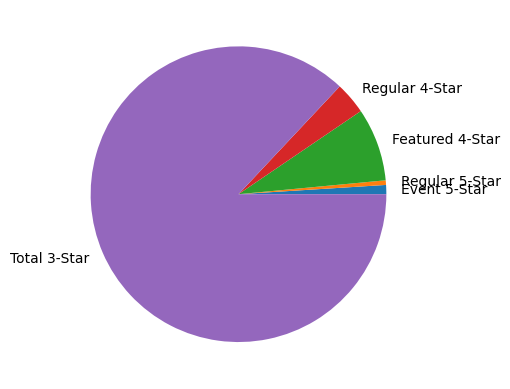

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example of using the CharacterBanner system
banner = CharacterBanner()
attempts = 200
results = [banner.wish() for _ in range(attempts)]

print("Item obtained that are not 3-Star:")
# Display results that are not 3-star
for i in range(len(results)):
    if results[i] != "3-Star Weapon":
        print("#{:<3} attempt: {}".format(i, results[i]))

print("\nIn " + str(attempts) + " attempts:")
banner.print_result()

item_counts = banner.get_item_counts_specific()
labels = []
data = []
for key in item_counts:
    labels.append(key)
    data.append(item_counts[key])

plt.pie(np.array(data), labels=labels)
plt.show()

### Step 2: Calculating the Expected Cost of Target Items

#### Module 6: Probability

To answer the question raised in the introduction section, we will refer to the following key points in Module 6: Probability:

##### The definition of Probability:

If _S_ is a finite nonempty sample space of equally likely outcomes, and _Event_ is an event, that is, a subset of _S_, then the probability of _Event_ is  
**p(Event) = |Event|/|S|** (Source: Rosen, K. _Discrete Mathematics and Its Application 7th Edition_)

##### Probability Distribution:

The function _p_ from the set of all outcomes of the sample space _S_ is called a probability distribution.
To model an experiment, the probability _p(s)_ assigned to an outcome _s_ should equal the limit of the number of times _s_ occurs divided by the number of times the experiment is performed, as this number grows without bounds. (Source: Rosen, K. _Discrete Mathematics and Its Application 7th Edition_)

#### 2.0 Calculation of Expected Cost Breakdown

If a player aims to obtain a specific tiered item, such as an Event 5-Star Character, then any item that is not an Event 5-Star Character will be considered an added value to the cost of the Event 5-Star Character.

Therefore, the expected cost of an item can be calculated using:
**C(Target) = Cost of a Single Wish \* Number of Wishes Taken to Obtain Target**

Therefore, to accurately compute the expected cost of a type of item in Genshin Impact, I will compute two key factors:

1. **Cost of a Single Wish**: This is the monetary value associated with each attempt or 'Wish' in the game.
2. **Number of Wishes Took to Obtain Target**: To calculate this, I will use two methods

#### 2.1 Cost of a Single Wish

![Price](image/Price.PNG)
This image presents the various pricing options for purchasing Genesis Crystals. For the purposes of this report, Genesis Crystals are treated as equivalent to Primogems, because 1 Genesis Crystal = 1 Primogem. The key difference between these two currencies is their acquisition method: Genesis Crystals are exclusively purchasable with real money, whereas Primogems can be earned through in-game activities. We will refer to Primogems as the sole virtual currency to simplify our analysis.

As different pricing options result in varying average costs per Primogem, our analysis aims to determine the expected price of an in-game item based on the most cost-effective purchasing option. Therefore, we will primarily consider the $99.9 package, which offers the best value for Genesis Crystals. It is assumed that players primarily acquire Genesis Crystals through this package for the purposes of this analysis.

##### Calculating the Approximate Value of 1 Wish:

Given that:  
$99.9 -> 6480 + 1600 Genesis Crystal (Primogems)  
160 Primogem -> 1 Wish

Therefore:  
**1 Primogem costs at least 0.0124 USD**  
**1 Wish costs approximately 1.97 USD**

#### 2.2 Number of Wishes Taken to Obtain Target

1. Method 1: Use the inversion of the probability of obtaining the target as the result. For this method, I will need to calculate:
   - **Probability of Obtaining an Item**: Note that this isn't simply the base rate provided by the game. The 'pity system' alters these probabilities, making the actual likelihood of obtaining an item different from the base rates. Therefore, I will utilize the Python program above and calculate the probability:
     - **P(Obtaining an item) = # of Attempts Obtained this Item / Total # of attempts**
   - The expected cost of an item is then calculated by:
     - **C(Item) = Cost of a Single Wish \* (1/P(Obtaining this Item))**
2. Method 2: Utilize a histogram and use the most likely first occurrence of the target item as the Number of Wishes Taken to Obtain Target.


In [3]:
# Method 1: Number of Wishes Took to Obtain Target = 1 / P (Obtaining Target)

import random
import math

n = 1000  # of experiments
prob_sum_5_star = 0
prob_sum_4_star = 0

for i in range(n):
    # perform an experiment with w wishes
    banner = CharacterBanner()
    w = 10000  # of wishes exchanged per experiment
    for j in range(w):
        banner.wish()
    prob_5_star = banner.total_event_5_star / w
    prob_4_star = banner.total_featured_4_star / w
    prob_sum_5_star += prob_5_star
    prob_sum_4_star += prob_4_star

# calculate average
avg_5_star = prob_sum_5_star / n
avg_4_star = prob_sum_4_star / n

print("     P(Event 5-Star):", round(avg_5_star, 6))
print("  P(Featured 4-Star):", round(avg_4_star, 6))
print("   1/P(Event 5-Star):", math.ceil(1 / avg_5_star))
print("1/P(Featured 4-Star):", math.ceil(1 / avg_4_star))

     P(Event 5-Star): 0.009306
  P(Featured 4-Star): 0.077071
   1/P(Event 5-Star): 108
1/P(Featured 4-Star): 13


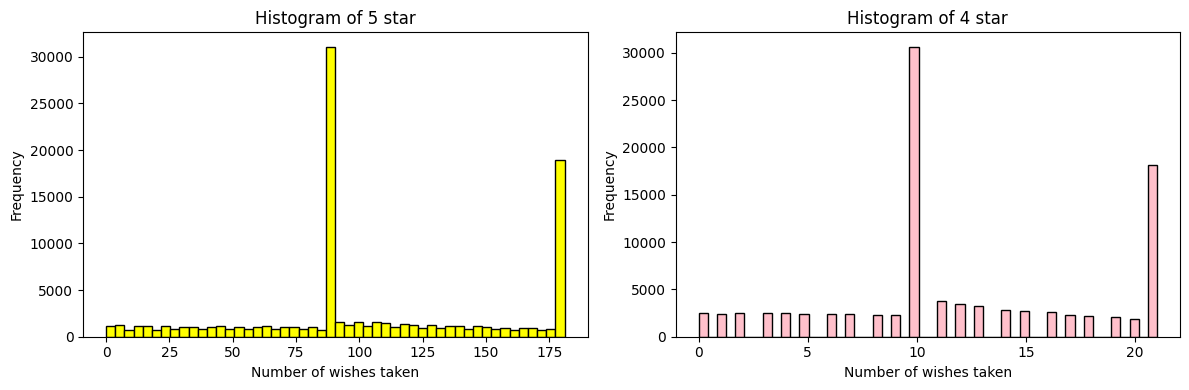

Most Frequent Number of Wishes Taken to Obtain Event 5-Star: 168
Most Frequent Number of Wishes Taken to Obtain Featured 4-Star: 16


In [4]:
# Method 2: Histogram to show the most likely Number of Wishes Taken to Obtain Target

import matplotlib.pyplot as plt
import numpy as np

x = 100000  # of experiments

max_wish_taken_5_star = {}
max_wish_taken_4_star = {}

wish_taken_5_star_list = []
wish_taken_4_star_list = []
for k in range(x):
    banner = CharacterBanner()

    wish_taken_5_star = 0
    wish_taken_4_star = 0

    while banner.total_event_5_star < 1 or banner.total_featured_4_star < 1:
        banner.wish()
        if banner.total_event_5_star < 1:
            wish_taken_5_star += 1
        if banner.total_featured_4_star < 1:
            wish_taken_4_star += 1

    if wish_taken_5_star in max_wish_taken_5_star:
        max_wish_taken_5_star[wish_taken_5_star] += 1
    else:
        max_wish_taken_5_star[wish_taken_5_star] = 1

    if wish_taken_4_star in max_wish_taken_4_star:
        max_wish_taken_4_star[wish_taken_4_star] += 1
    else:
        max_wish_taken_4_star[wish_taken_4_star] = 1

    wish_taken_5_star_list.append(wish_taken_5_star)
    wish_taken_4_star_list.append(wish_taken_4_star)

wish_taken_5_star_arr = np.array(wish_taken_5_star_list)
wish_taken_4_star_arr = np.array(wish_taken_4_star_list)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(wish_taken_5_star_arr, bins=50, color="Yellow", edgecolor="black")
axes[0].set_title("Histogram of 5 star")

axes[1].hist(wish_taken_4_star_arr, bins=50, color="Pink", edgecolor="black")
axes[1].set_title("Histogram of 4 star")

# Adding labels and title
for ax in axes:
    ax.set_xlabel("Number of wishes taken")
    ax.set_ylabel("Frequency")

# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

max_5 = 0
max_4 = 0
for key in max_wish_taken_5_star:
    if max_wish_taken_5_star[key] > max_5:
        max_5 = key
print("Most Frequent Number of Wishes Taken to Obtain Event 5-Star:", max_5)

for key in max_wish_taken_4_star:
    if max_wish_taken_4_star[key] > max_4:
        max_4 = key
print("Most Frequent Number of Wishes Taken to Obtain Featured 4-Star:", max_4)

## Conclusion

### Answer

Since players participating in the banner typically aim for either an Event 5-Star character or a Featured 4-Star character, we will only calculate the expected cost of these two:  
**C(Event 5-Star)** & **C(Featured 4-Star)**.

Before revealing the results, it's also important to differentiate between the expected costs for active and dormant players, so we can establish a range of expected costs. We define an average active player as someone who completes all in-game daily quests every day during an Event Banner. Therefore, an active player will gain:  
**60 Primogems/day \* 21 days = 1260 Primogems** during an Event Banner,  
which means they will spend approximately **15.624 USD** less than a dormant player (1260 \* 0.0124 USD).

#### Method 1 Results:

Based on Method 1, the expected cost of an item is calculated using:  
**C(Target) = Cost of a Single Wish \* 1/P(Obtaining Target)**

Total Primogems:

- C(Event 5-Star): 160 Primogems \* 108 = 17280 Primogems
- C(Featured 4-Star): 160 Primogems \* 13 = 2080 Primogems

| Target                 | Base Rate | Actual Rate (counted Pity) | 1/ Actual Rate | Expected Primogem Required | Expected Additional USD Required (Active Player) | Expected Additional USD Required (Dormant Player) |
| ---------------------- | --------- | -------------------------- | -------------- | -------------------------- | ------------------------------------------------ | ------------------------------------------------- |
| Event 5★ Character     | 0.6%      | 0.93%                      | 108            | 17280                      | 198.65                                           | 214.27                                            |
| Featured 4★ Characters | 5.1%      | 7.7%                       | 13             | 2080                       | 10.17                                            | 25.80                                             |

#### Method 2 Results:

Using Method 2, the Expected Cost of a target item is calculated as:  
**C(Target) = Cost of a Single Wish \* Number of Wishes Taken to Obtain Target**

Total Primogems:

- C(Event 5-Star): 160 Primogems \* 168 = 26880 Primogems
- C(Featured 4-Star): 160 Primogems \* 16 = 2560 Primogems

| Target                | Most Likely Number of Wishes Taken to Obtain Target | Expected Primogem Required | Expected Additional USD Required (Active Player) | Expected Additional USD Required (Dormant Player) |
| --------------------- | --------------------------------------------------- | -------------------------- | ------------------------------------------------ | ------------------------------------------------- |
| Event 5★ Character    | 161                                                 | 26880                      | 317.69                                           | 333.31                                            |
| Featured 4★ Character | 7                                                   | 2560                       | 16.12                                            | 31.74                                             |

### Weakness/Limitation

The calculation is not exact. First of all, players' invested time in the game varies, and because the pity system is inheritable across banners, if a player does not participate in a banner, they may have saved up a significant amount of Primogems for the next banner, possibly eliminating the need to purchase any Primogems at all. I assumed that players only buy Primogems with the $99.9 package option, but that's most likely not the case in the real world. Therefore, due to the various approximated values I used during calculations, the final result may have deviated significantly from the 'true' result.

### Reflection

In this project, I analyzed one of my favorite games to gain a better understanding of its Gacha system. I realized that, even though the game is free to play, it actually expects players to spend a significant amount of money on in-game content. However, because players, like myself, often spend money at separate times, we may not realize how much we've cumulatively spent on the game. Personally, I now find that using real money to buy in-game content in Genshin Impact is completely unworthy. For comparison, some high-quality AAA games, offering hundreds of hours of gameplay, cost around 60 USD per game, but acquiring a single 5-star character in Genshin Impact can cost more than 200 USD, which is absurd. Therefore, after completing this project, I've decided I will no longer spend any money on virtual items in Genshin Impact.

Moreover, I believe I have developed a good foundation for analyzing the expected cost of a virtual item, so I would like to spend my free time expanding this tool. I'm thinking of adding an interface to this tool so other players can use it. The tool should support custom inputs to fit players' needs. Additionally, now I have a tool to test my numerical design in the future if I were to create a Gacha game. I think it's important for game developers to keep in mind ethical game design, ensuring we make money without exploiting our players.
